<a href="https://colab.research.google.com/github/victor-iyi/llm-examples/blob/main/Semantic_Chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU semantic-router chromadb datasets python-dotenv

In [ ]:
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
!echo 'OPENAI_API_KEY='{OPENAI_API_KEY} > .env

In [ ]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
from datasets import load_dataset

dataset = load_dataset('jamescalam/ai-arxiv2', split='train')
dataset

Generating train split:   0%|          | 0/2673 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'summary', 'source', 'authors', 'categories', 'comment', 'journal_ref', 'primary_category', 'published', 'updated', 'content', 'references'],
    num_rows: 2673
})

In [ ]:
from semantic_router.encoders import OpenAIEncoder

encoder = OpenAIEncoder(name='text-embedding-3-small')
encoder

OpenAIEncoder(name='text-embedding-3-small', score_threshold=0.82, type='openai', client=<openai.OpenAI object at 0x7d410dadc4f0>, dimensions=NOT_GIVEN, token_limit=8192)

In [ ]:
from semantic_router.splitters import RollingWindowSplitter
from semantic_router.utils.logger import logger

logger.setLevel('WARNING')  # reduce logs from splitter

splitter = RollingWindowSplitter(
    encoder=encoder,
    dynamic_threshold=True,
    min_split_tokens=100,
    max_split_tokens=500,
    window_size=2,
    plot_splits=True,  # set this for visualizing chunking
    enable_statistics=True,  # to print chunking stats
)
splitter

RollingWindowSplitter(name='rolling_window_splitter', encoder=OpenAIEncoder(name='text-embedding-3-small', score_threshold=0.82, type='openai', client=<openai.OpenAI object at 0x7d410dadc4f0>, dimensions=NOT_GIVEN, token_limit=8192), threshold_adjustment=0.01, dynamic_threshold=True, window_size=2, plot_splits=True, min_split_tokens=100, max_split_tokens=500, split_tokens_tolerance=10, enable_statistics=True)

In [ ]:
dataset[0]['content']

"4 2 0 2\nn a J 8 ] G L . s c [\n1 v 8 8 0 4 0 . 1 0 4 2 : v i X r a\n# Mixtral of Experts\nAlbert Q. Jiang, Alexandre Sablayrolles, Antoine Roux, Arthur Mensch, Blanche Savary, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Emma Bou Hanna, Florian Bressand, Gianna Lengyel, Guillaume Bour, Guillaume Lample, LÃ©lio Renard Lavaud, Lucile Saulnier, Marie-Anne Lachaux, Pierre Stock, Sandeep Subramanian, Sophia Yang, Szymon Antoniak, Teven Le Scao, ThÃ©ophile Gervet, Thibaut Lavril, Thomas Wang, TimothÃ©e Lacroix, William El Sayed\n\nAbstract\nWe introduce Mixtral 8x7B, a Sparse Mixture of Experts (SMoE) language model. Mixtral has the same architecture as Mistral 7B, with the difference that each layer is composed of 8 feedforward blocks (i.e. experts). For every token, at each layer, a router network selects two experts to process the current state and combine their outputs. Even though each token only sees two experts, the selected experts can be different at each timestep. A

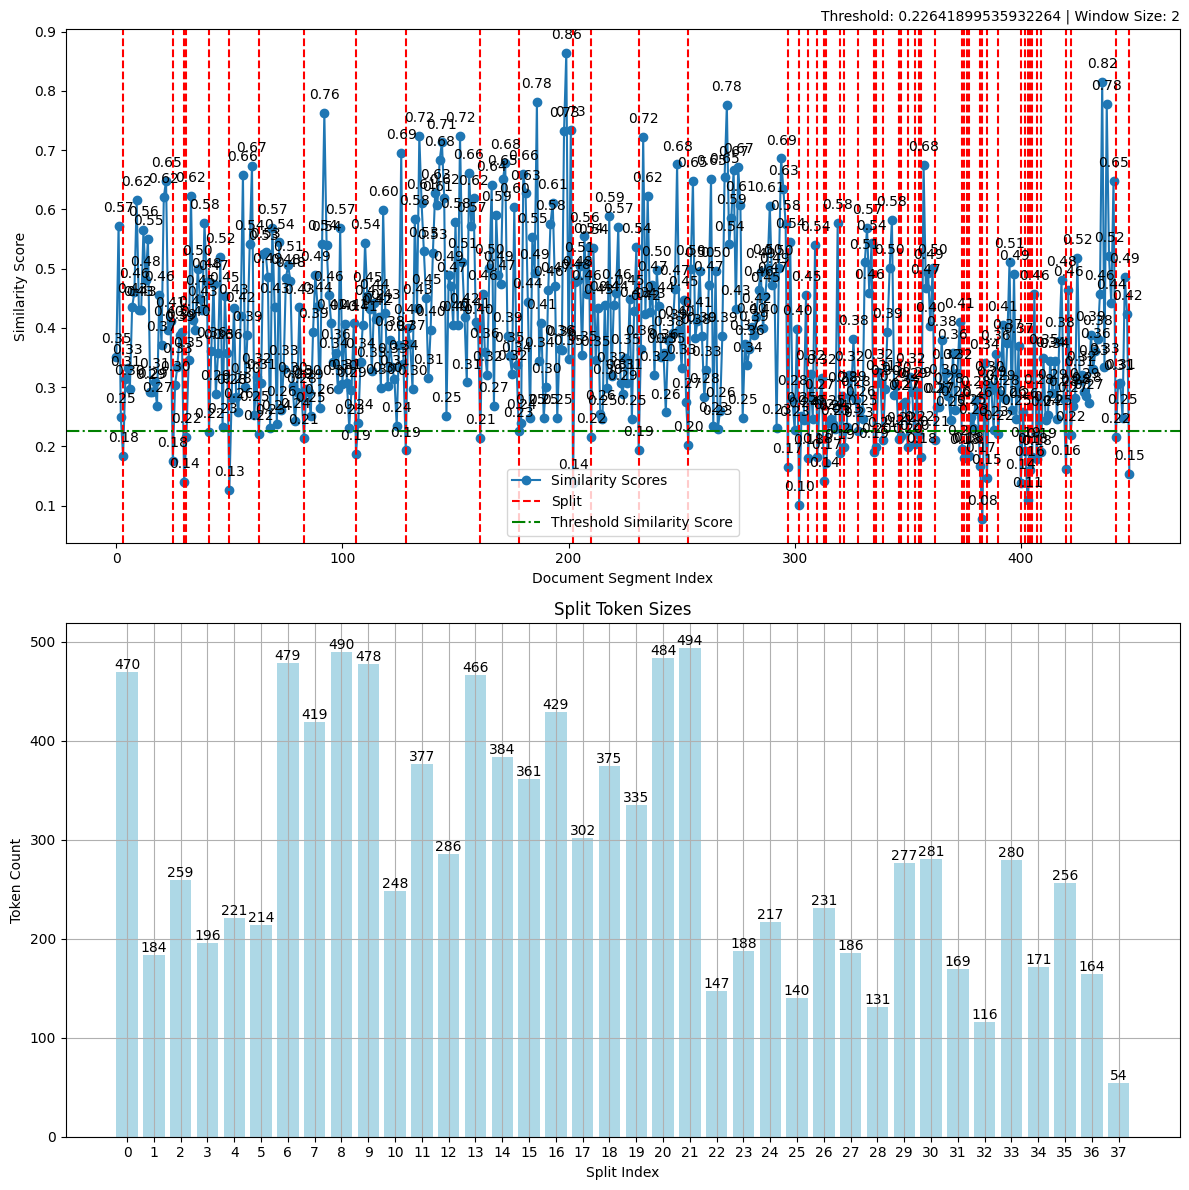

Splitting Statistics:
  - Total Documents: 450
  - Total Splits: 38
  - Splits by Threshold: 27
  - Splits by Max Chunk Size: 10
  - Last Split: 1
  - Minimum Token Size of Split: 54
  - Maximum Token Size of Split: 494
  - Similarity Split Ratio: 0.71


In [ ]:
splits = splitter([dataset[0]['content']])

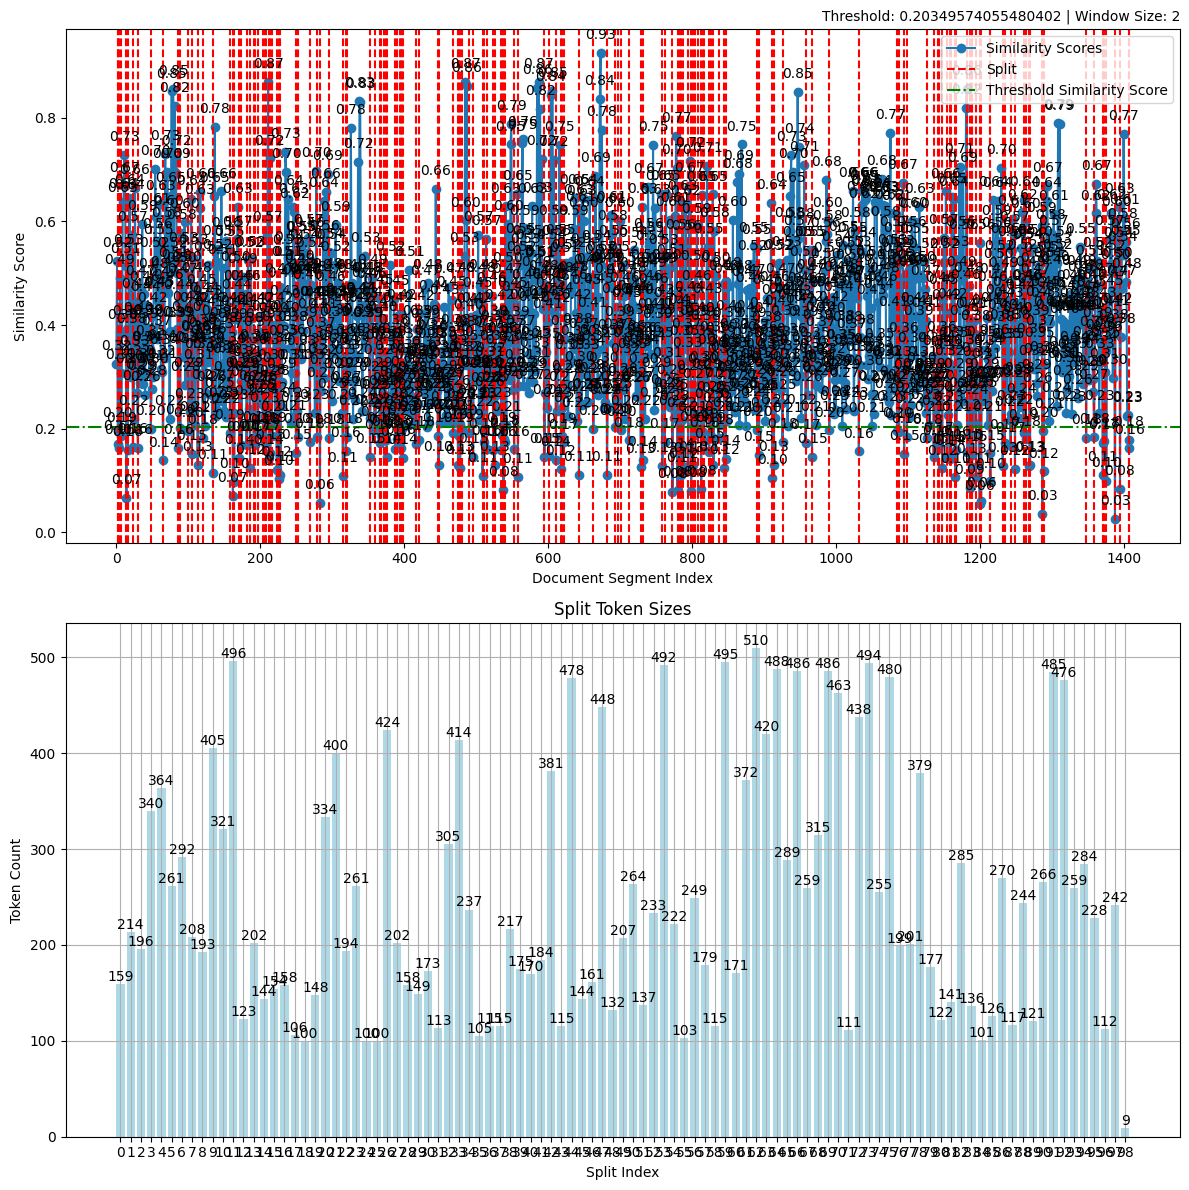

Splitting Statistics:
  - Total Documents: 1410
  - Total Splits: 99
  - Splits by Threshold: 83
  - Splits by Max Chunk Size: 15
  - Last Split: 1
  - Minimum Token Size of Split: 9
  - Maximum Token Size of Split: 510
  - Similarity Split Ratio: 0.84


In [ ]:
splits = splitter([dataset[2]['content']])

In [ ]:
splitter.print(splits[:3])

Split 1, tokens 159, triggered by: 0.19
3 2 0 2 c e D 9 1 ] I A . s c [ 2 v 1 1 1 1 1 . 2 1 3 2 : v i X r a # The Good, The Bad, and Why: Unveiling Emotions in Generative AI* Cheng Li1,2, Jindong Wang1â , Yixuan Zhang3, Kaijie Zhu1, Xinyi Wang4, Wenxin Hou1, Jianxun Lian1, Fang Luo4, Qiang Yang5, Xing Xie1 1Microsoft Research 2Institute of Software, CAS 3William&Mary 4Beijing Normal University 5Hong Kong University of Science and Technology # Abstract
----------------------------------------------------------------------------------------


Split 2, tokens 214, triggered by: 0.07
Emotion significantly impacts our daily behaviors and interactions. While recent genera- tive AI models, such as large language models, have shown impressive performance in various tasks, it remains unclear whether they truly comprehend emotions. This paper aims to address this gap by incorporating psychological theories to gain a holistic understanding of emotions in generative AI models. Specifically, we pro

In [ ]:
len(splits)

99

In [ ]:
splits[:3]

[DocumentSplit(docs=['3 2 0 2 c e D 9 1', '] I A . s c [', '2 v 1 1 1 1 1 . 2 1 3 2 : v i X r a', '# The Good, The Bad, and Why:', 'Unveiling Emotions in Generative AI*', 'Cheng Li1,2, Jindong Wang1â', ', Yixuan Zhang3, Kaijie Zhu1, Xinyi Wang4, Wenxin Hou1, Jianxun Lian1, Fang Luo4, Qiang Yang5, Xing Xie1 1Microsoft Research 2Institute of Software, CAS 3William&Mary 4Beijing Normal University 5Hong Kong University of Science and Technology', '# Abstract'], is_triggered=True, triggered_score=0.1853718181143938, token_count=159, metadata=None),
 DocumentSplit(docs=['Emotion significantly impacts our daily behaviors and interactions.', 'While recent genera- tive AI models, such as large language models, have shown impressive performance in various tasks, it remains unclear whether they truly comprehend emotions.', 'This paper aims to address this gap by incorporating psychological theories to gain a holistic understanding of emotions in generative AI models.', 'Specifically, we propose t

In [ ]:
splits[0]

DocumentSplit(docs=['3 2 0 2 c e D 9 1', '] I A . s c [', '2 v 1 1 1 1 1 . 2 1 3 2 : v i X r a', '# The Good, The Bad, and Why:', 'Unveiling Emotions in Generative AI*', 'Cheng Li1,2, Jindong Wang1â', ', Yixuan Zhang3, Kaijie Zhu1, Xinyi Wang4, Wenxin Hou1, Jianxun Lian1, Fang Luo4, Qiang Yang5, Xing Xie1 1Microsoft Research 2Institute of Software, CAS 3William&Mary 4Beijing Normal University 5Hong Kong University of Science and Technology', '# Abstract'], is_triggered=True, triggered_score=0.1853718181143938, token_count=159, metadata=None)

In [ ]:
splits[0].content

'3 2 0 2 c e D 9 1 ] I A . s c [ 2 v 1 1 1 1 1 . 2 1 3 2 : v i X r a # The Good, The Bad, and Why: Unveiling Emotions in Generative AI* Cheng Li1,2, Jindong Wang1â , Yixuan Zhang3, Kaijie Zhu1, Xinyi Wang4, Wenxin Hou1, Jianxun Lian1, Fang Luo4, Qiang Yang5, Xing Xie1 1Microsoft Research 2Institute of Software, CAS 3William&Mary 4Beijing Normal University 5Hong Kong University of Science and Technology # Abstract'

In [ ]:
def build_chunk(title: str, content: str) -> str:
  return f'# {title}\n{content}'

# We use it like:
title = dataset[2]['title']
for s in splits[:3]:
  print('---')
  print(build_chunk(title, content=s.content))

---
# The Good, The Bad, and Why: Unveiling Emotions in Generative AI
3 2 0 2 c e D 9 1 ] I A . s c [ 2 v 1 1 1 1 1 . 2 1 3 2 : v i X r a # The Good, The Bad, and Why: Unveiling Emotions in Generative AI* Cheng Li1,2, Jindong Wang1â , Yixuan Zhang3, Kaijie Zhu1, Xinyi Wang4, Wenxin Hou1, Jianxun Lian1, Fang Luo4, Qiang Yang5, Xing Xie1 1Microsoft Research 2Institute of Software, CAS 3William&Mary 4Beijing Normal University 5Hong Kong University of Science and Technology # Abstract
---
# The Good, The Bad, and Why: Unveiling Emotions in Generative AI
Emotion significantly impacts our daily behaviors and interactions. While recent genera- tive AI models, such as large language models, have shown impressive performance in various tasks, it remains unclear whether they truly comprehend emotions. This paper aims to address this gap by incorporating psychological theories to gain a holistic understanding of emotions in generative AI models. Specifically, we propose three approaches: 1) Emoti